In [1]:
%reload_ext autoreload
%autoreload 2

### Scores for bias Gen

./Final_Test_MetricsBase_CNN_Part2_aug_2.npz
             precision    recall  f1-score   accuary
cloth         0.857143      0.81  0.832905  0.856828
no_face       0.850467  0.905473  0.877108  0.890558
surgical      0.845361  0.824121  0.834606  0.858079
n95           0.831818     0.915  0.871429  0.886076
incorrect     0.885246      0.81  0.845953  0.866516
                                                    
weighted avg  0.854012     0.853  0.852443          
Overall acc:  0.853


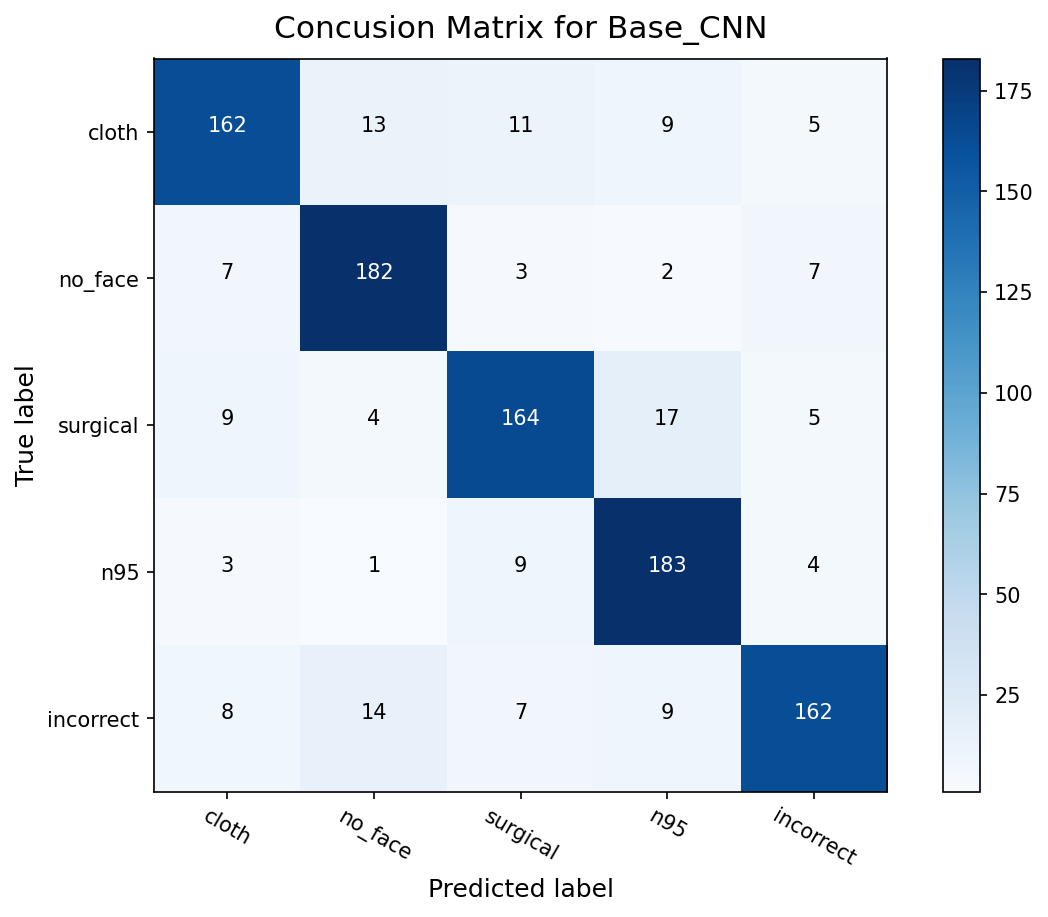

./Final_Test_MetricsBase_CNN_Part2_aug_2.npz
             precision    recall  f1-score   accuary bias(fm - m)
cloth_m       0.794521  0.828571  0.811189  0.841176             
cloth_fm      0.896552       0.8  0.845528  0.866197    0.0250207
no_face_m      0.87619  0.910891  0.893204  0.903509             
no_face_fm    0.825688       0.9  0.861244  0.878151   -0.0253575
surgical_m    0.818182  0.782609       0.8  0.833333             
surgical_fm   0.859375  0.846154  0.852713  0.871622    0.0382883
n95_m             0.86  0.945055  0.900524  0.909524             
n95_fm        0.808333  0.889908  0.847162  0.867424   -0.0420996
incorrect_m   0.928571  0.783133  0.849673  0.869318             
incorrect_fm  0.858407   0.82906  0.843478  0.864662  -0.00465653
                                                                 
weighted avg  0.855279     0.853  0.852591                       
Overall acc:  0.853


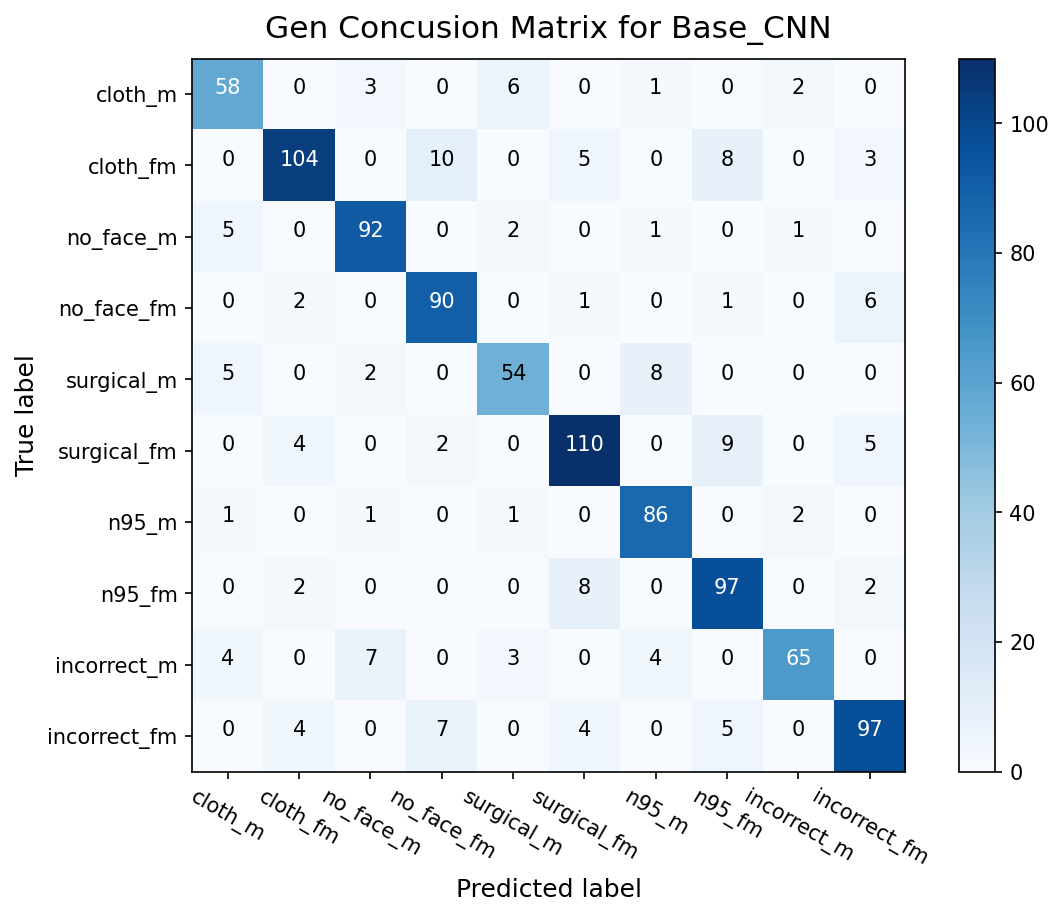

./Final_Test_MetricsBase_CNN_Part2_aug_2.npz
               precision    recall  f1-score   accuary bias(afar - caas)
cloth_caas      0.869565  0.805369  0.836237  0.859281                  
cloth_afar      0.823529  0.823529  0.823529      0.85       -0.00928144
no_face_caas    0.840909  0.909836  0.874016  0.888112                  
no_face_afar    0.865854  0.898734  0.881988  0.894444        0.00633256
surgical_caas   0.834437  0.818182   0.82623  0.851955                  
surgical_afar   0.883721  0.844444  0.863636      0.88         0.0280447
n95_caas         0.82659  0.916667  0.869301  0.884409                  
n95_afar        0.851064  0.909091  0.879121  0.892157        0.00774826
incorrect_caas  0.898649  0.826087  0.860841  0.877841                  
incorrect_afar  0.828571   0.74359  0.783784  0.822222        -0.0556187
                                                                        
weighted avg    0.854221     0.853  0.852465                            
Overal

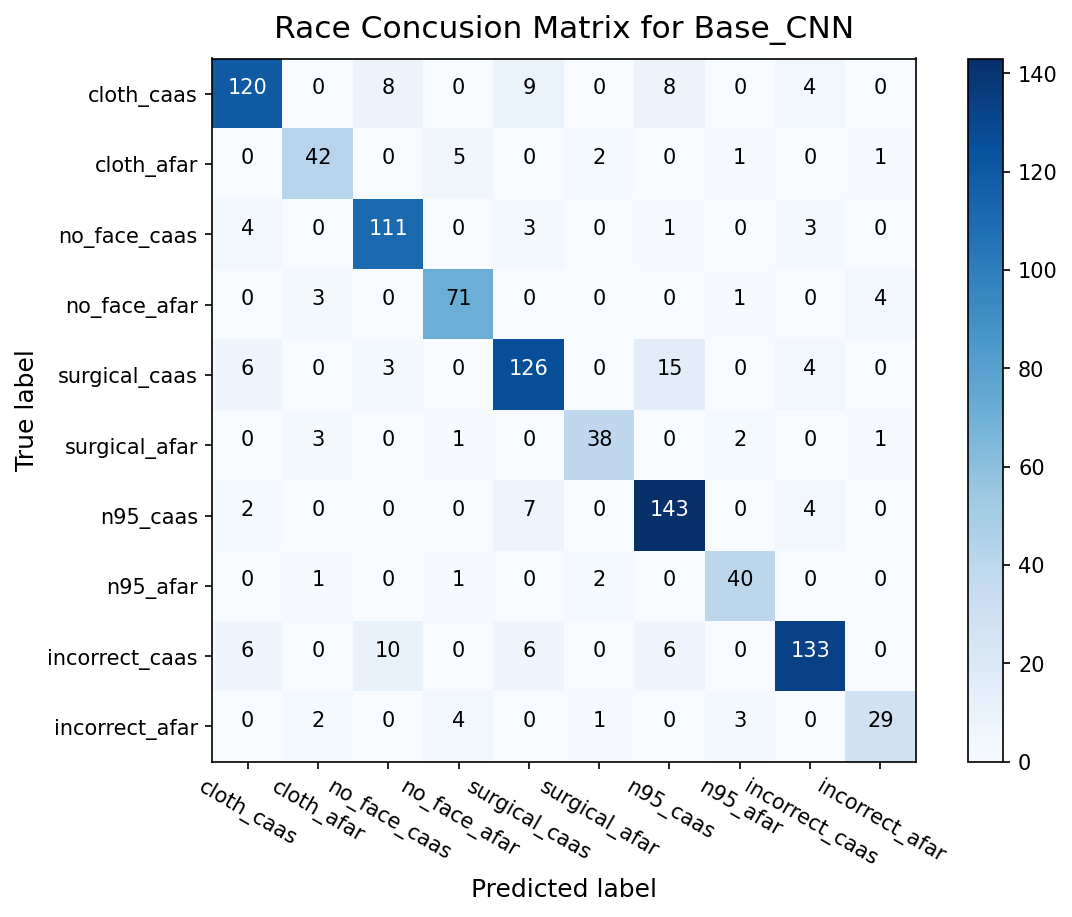

In [12]:
import evaluation

metrics_file_path = './Final_Test_MetricsBase_CNN_Part2_aug_2.npz'

evaluation.read_socres(metrics_file_path, conf_m_title='Concusion Matrix for Base_CNN')
evaluation.read_socres_gen(metrics_file_path, conf_m_title='Gen Concusion Matrix for Base_CNN')
evaluation.read_socres_race(metrics_file_path, conf_m_title='Race Concusion Matrix for Base_CNN')

In [13]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as T
import matplotlib.pyplot as plt

from data_process.DatasetHelper import label_map
from data_process.DatasetHelper import label_map_new
from data_process.DatasetHelper import ImageDataset

data = ImageDataset('./data/aug_2')
data_loader = torch.utils.data.DataLoader(data, batch_size=100000, shuffle=True, num_workers=1)

for data, labels in data_loader:
    data_X, data_y = data.float(), labels
    
data_y = data_y.numpy()

label: 0 with 1000 images, named as "cloth_mask"
label: 1 with 1000 images, named as "no_face_mask"
label: 2 with 1000 images, named as "surgical_mask"
label: 3 with 1000 images, named as "n95_mask"
label: 4 with 1000 images, named as "mask_worn_incorrectly"


In [14]:
from evaluation import downgrade_argmax_target_to_gen, mask_label_name_list
from data_process.DatasetHelper import label_map_new_gen

gen_label_list = [downgrade_argmax_target_to_gen(y) for y in data_y]

d = {}

for l in gen_label_list:
    l_name = label_map_new_gen[l]
    if d.get(l_name) == None:
        d[l_name] = 0
    d[l_name] += 1

print(d)

gen_arr = {'m': [d[mask_male_label] for mask_male_label in [l + '_m' for l in mask_label_name_list]], 
           'fm': [d[mask_male_label] for mask_male_label in [l + '_fm' for l in mask_label_name_list]]}

bias = []

for i in range(5):
    bias.append(gen_arr['fm'][i] - gen_arr['m'][i])
    
gen_arr['bias(fm - m)'] = bias

import pandas as pd
df = pd.DataFrame(data=gen_arr, index=mask_label_name_list)

df

{'no_face_mask_m': 503, 'n95_mask_fm': 546, 'n95_mask_m': 454, 'cloth_mask_fm': 651, 'mask_worn_incorrectly_fm': 583, 'mask_worn_incorrectly_m': 417, 'no_face_mask_fm': 497, 'cloth_mask_m': 349, 'surgical_mask_m': 347, 'surgical_mask_fm': 653}


,m,fm,bias(fm - m)
cloth_mask,349,651,302
no_face_mask,503,497,-6
surgical_mask,347,653,306
n95_mask,454,546,92
mask_worn_incorrectly,417,583,166


In [15]:
from evaluation import downgrade_argmax_target_to_race, mask_label_name_list
from data_process.DatasetHelper import label_map_new_race
race_label_list = [downgrade_argmax_target_to_race(y) for y in data_y]

d = {}

for l in race_label_list:
    l_name = label_map_new_race[l]
    if d.get(l_name) == None:
        d[l_name] = 0
    d[l_name] += 1

print(d)

race_arr = {'caas': [d[mask_male_label] for mask_male_label in [l + '_caas' for l in mask_label_name_list]], 
           'afar': [d[mask_male_label] for mask_male_label in [l + '_afar' for l in mask_label_name_list]]}

bias = []

for i in range(5):
    bias.append(race_arr['afar'][i] - race_arr['caas'][i])
    
race_arr['bias(afar - caas)'] = bias

import pandas as pd
df = pd.DataFrame(data=race_arr, index=mask_label_name_list)

df

{'no_face_mask_caas': 608, 'n95_mask_caas': 779, 'cloth_mask_afar': 253, 'mask_worn_incorrectly_caas': 806, 'n95_mask_afar': 221, 'mask_worn_incorrectly_afar': 194, 'cloth_mask_caas': 747, 'no_face_mask_afar': 392, 'surgical_mask_caas': 773, 'surgical_mask_afar': 227}


,caas,afar,bias(afar - caas)
cloth_mask,747,253,-494
no_face_mask,608,392,-216
surgical_mask,773,227,-546
n95_mask,779,221,-558
mask_worn_incorrectly,806,194,-612
